# Assignment 5 : Multiple Linear Regression

## Problem Statement

Consider only the below columns and prepare a prediction model for predicting Price.  
Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

Model -- model of the car  
Price  -- Offer Price in EUROs	  
Age_08_04 -- Age in months as in August 2004	  
Mfg_Month -- Manufacturing month (1-12)	  
Mfg_Year	-- Manufacturing Year  
KM -- Accumulated Kilometers on odometer  
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)  
HP -- Horse Power  
Met_Color	 -- Metallic Color?  (Yes=1, No=0)  
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)  
Automatic	-- Automatic ( (Yes=1, No=0)  
cc -- Cylinder Volume in cubic centimeters  
Doors -- Number of doors  
Cylinders	-- Number of cylinders  
Gears -- Number of gear positions  
Quarterly_Tax -- Quarterly road tax in EUROs  
Weight -- Weight in Kilograms  
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)  
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)  
Guarantee_Period -- 	Guarantee period in months  
ABS -- Anti-Lock Brake System (Yes=1, No=0)  
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)  
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)  
Airco -- Airconditioning  (Yes=1, No=0)  
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)  
Boardcomputer -- Boardcomputer  (Yes=1, No=0)  
CD_Player -- CD Player  (Yes=1, No=0)  
Central_Lock -- Central Lock  (Yes=1, No=0)  
Powered_Windows -- Powered Windows  (Yes=1, No=0)   
Power_Steering -- Power Steering  (Yes=1, No=0)  
Radio -- Radio  (Yes=1, No=0)  
Mistlamps	-- Mistlamps  (Yes=1, No=0)  
Sport_Model -- Sport Model  (Yes=1, No=0)  
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)  
Metallic_Rim --Metallic Rim  (Yes=1, No=0)  
Radio_cassette -- Radio Cassette  (Yes=1, No=0)  
Tow_Bar -- Tow Bar  (Yes=1, No=0)  




In [33]:
# import basic liberaries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#import data
df_ = pd.read_csv("C:\\Users\\Renu\\Desktop\\New folder\\assignment5\ToyotaCorolla.csv",encoding='latin1')
df_.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [35]:
df1_ = df_[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df1_.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [36]:
df1_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [37]:
df1_.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [38]:
df1_.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [39]:
sns.pairplot(data=df1_)

C:\Users\Renu\AppData\Local\Temp\ipykernel_32260\3062441545.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticks(), rotation = 45)


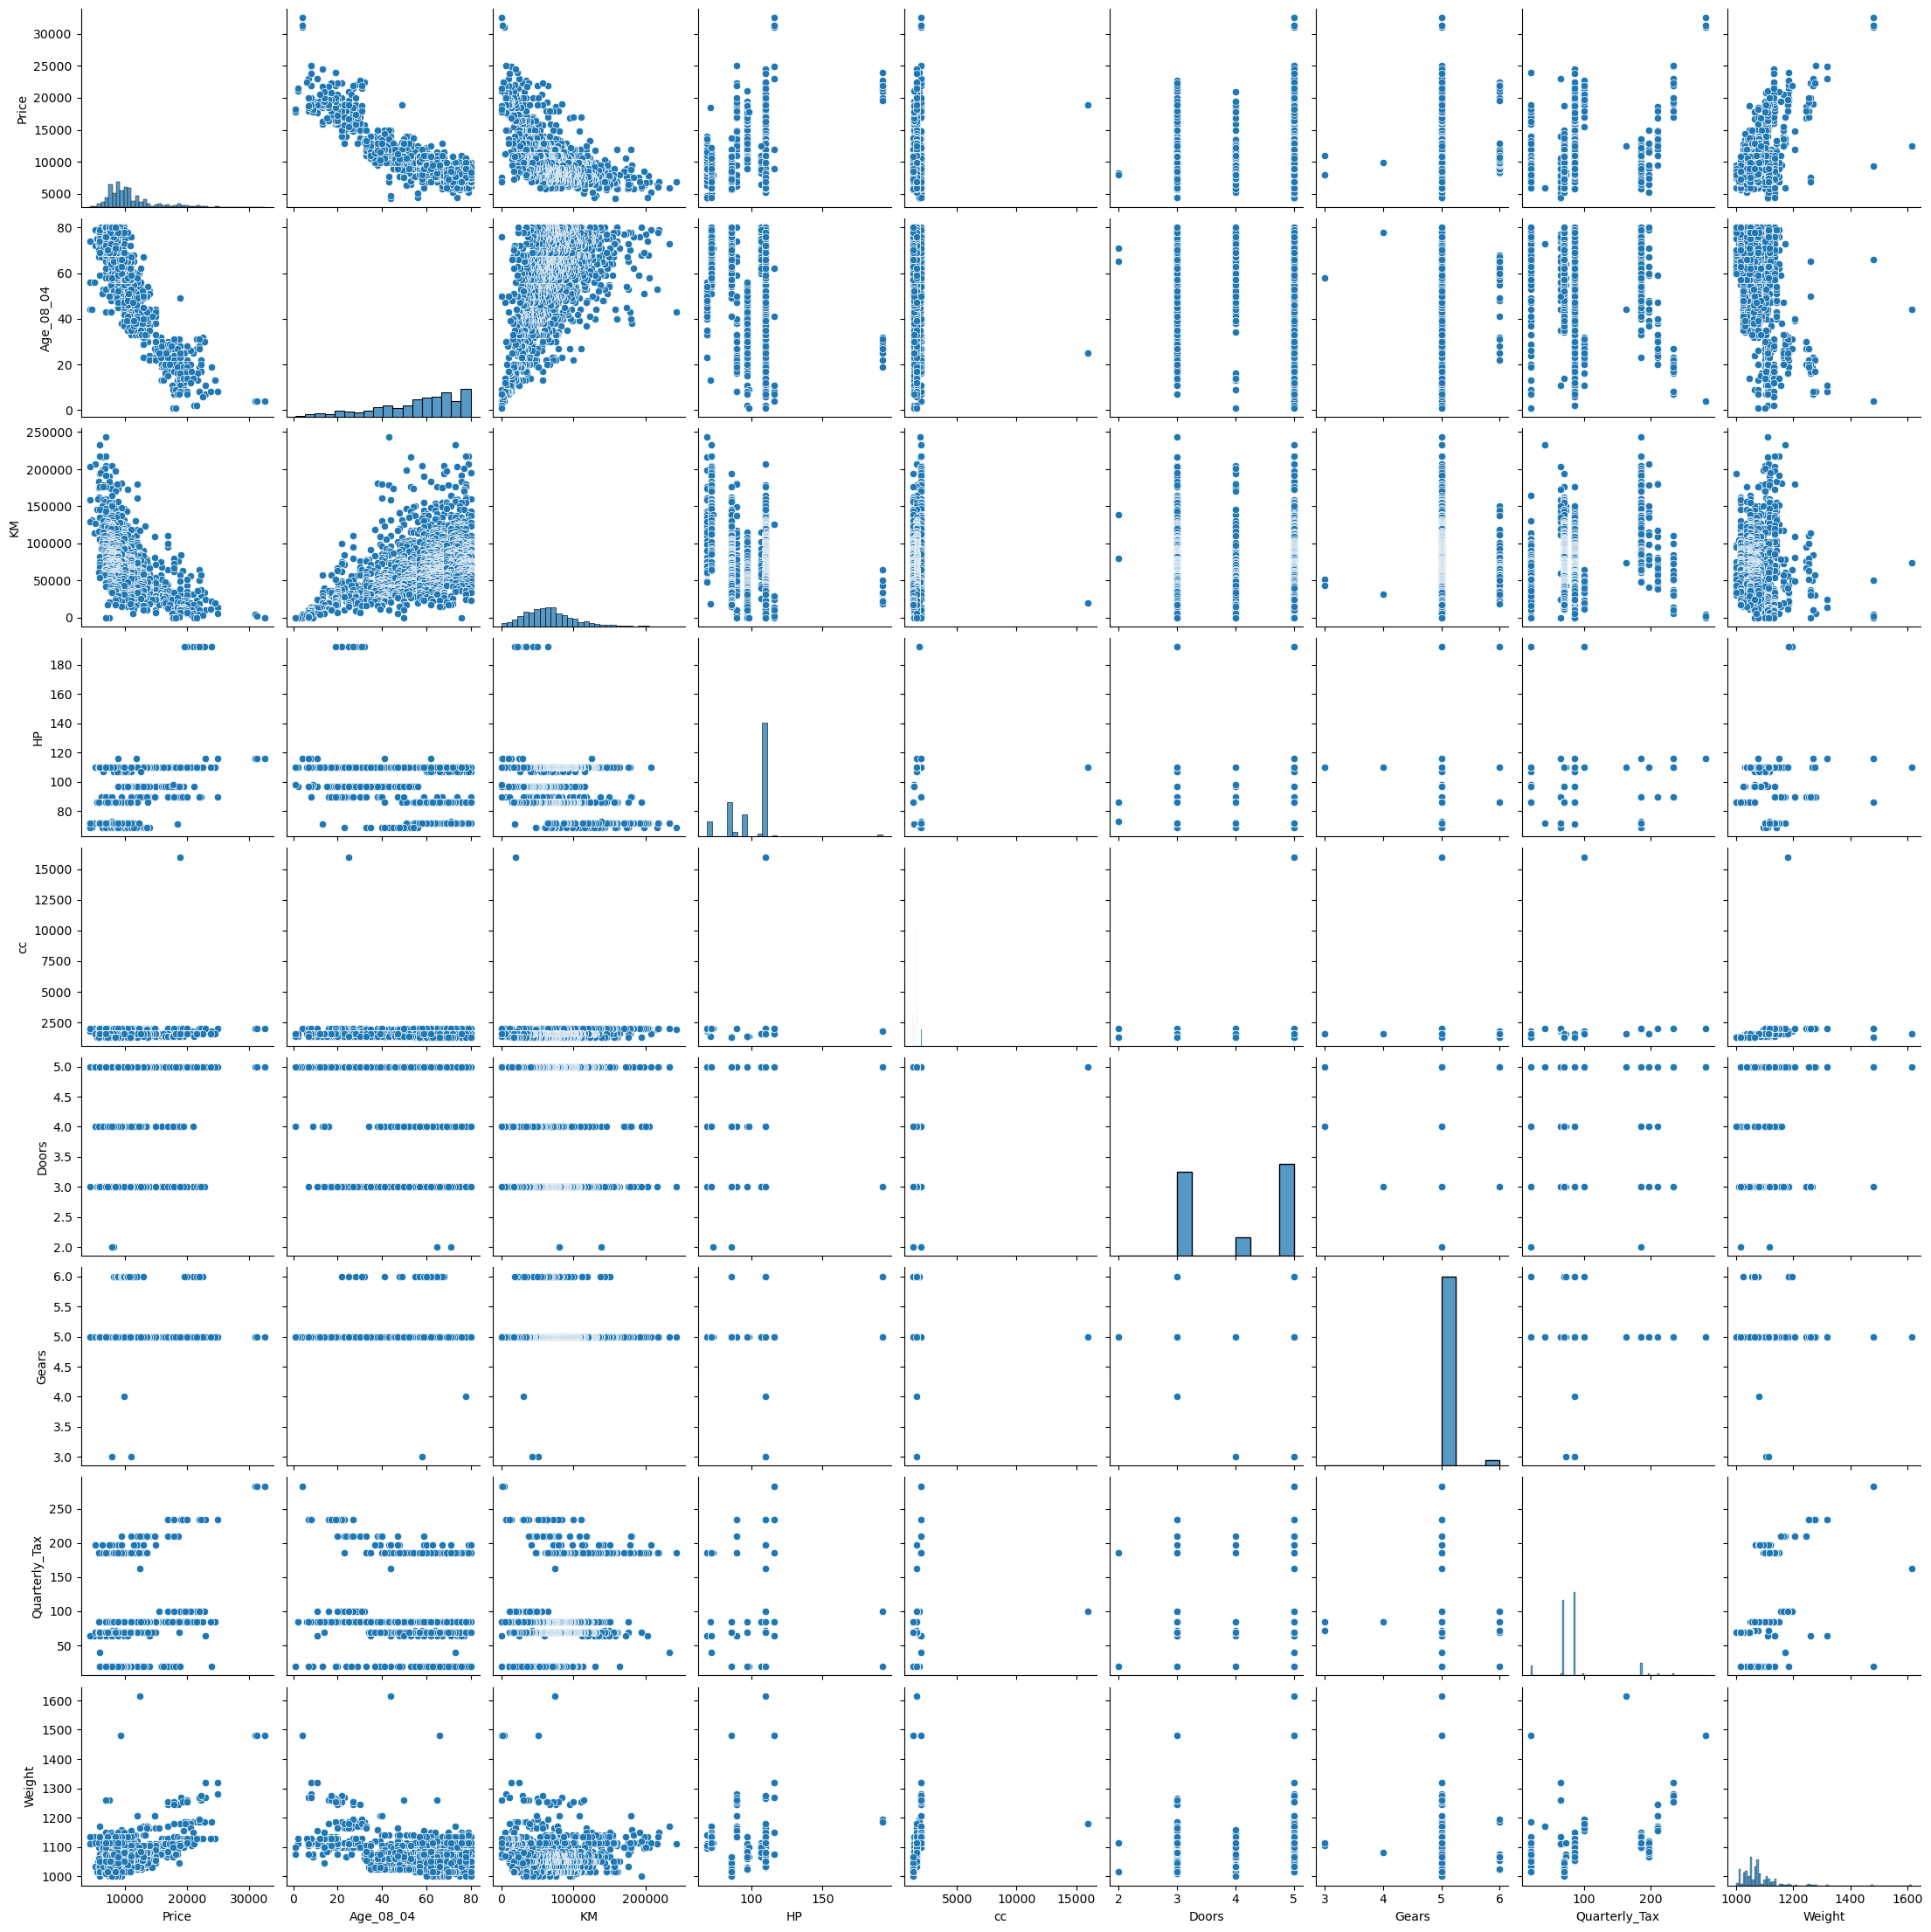

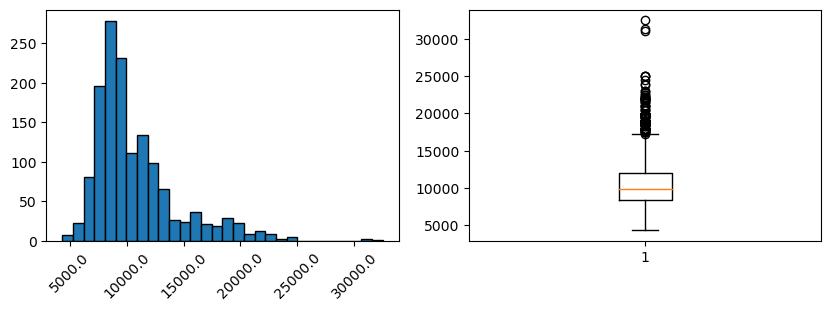

In [40]:
# distribution of the target i.e., Price
fig, ax = plt.subplots(1,2, figsize = (10,3))
ax[0].hist(df1_['Price'], bins= 30, edgecolor = 'black')
ax[0].set_xticklabels(ax[0].get_xticks(), rotation = 45)
ax[1].boxplot(df1_['Price'])
plt.show()

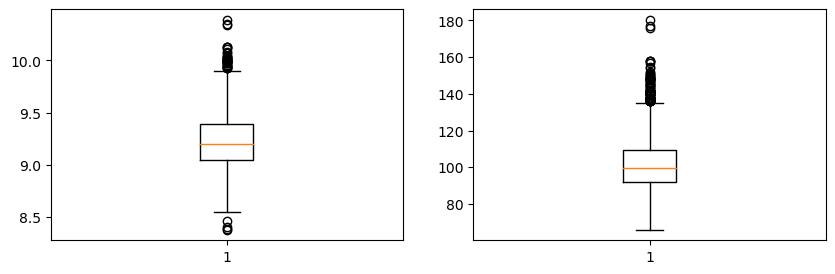

In [41]:
# since the target(profit) is not normally distributed and is negatively skewed we do transformations
fig, ax = plt.subplots(1,2, figsize = (10,3))
ax[0].boxplot(np.log(df1_['Price']))
ax[1].boxplot(np.sqrt(df1_['Price']))
plt.show()

In [42]:
Data_ = df1_.drop(columns = df1_[['Price']], axis = 1)
Target_ = df1_[['Price']]

In [43]:
model1_ = LinearRegression()
model2_ = LinearRegression()
model3_ = LinearRegression()
model1_.fit(Data_,Target_)
model2_.fit(Data_, np.log(Target_))
model3_.fit(Data_, np.sqrt(Target_))

LinearRegression()

In [44]:
# writing R_square values in tabilar form
d_ = {"model": ['no transformation', 'log_transformed','sqrt_transform'],
     "R_square_value": [model1_.score(Data_,Target_), model2_.score(Data_,np.log(Target_)),
                        model3_.score(Data_,np.sqrt(Target_))]}
Result_ = pd.DataFrame(data = d_)
Result_

,model,R_square_value
0,no transformation,0.863763
1,log_transformed,0.851509
2,sqrt_transform,0.866491


**Since all three models are performing similar. we will do model refinment through the removal of outliers first**

C:\Users\Renu\AppData\Local\Temp\ipykernel_32260\4126432289.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticks(), rotation = 45)


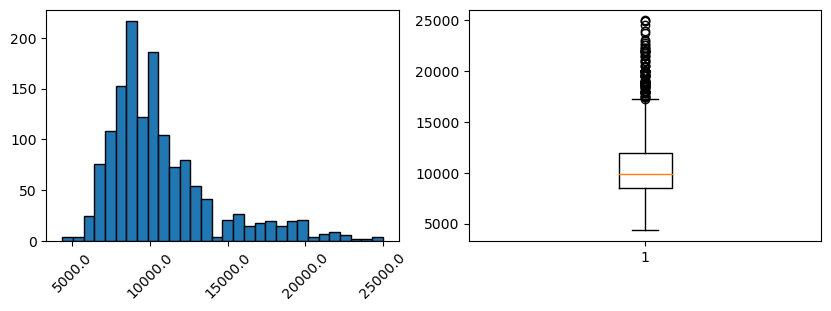

In [45]:
#since there is an outier we will drop the corresponding row/index
df2_ = df1_.drop(df1_[df1_.Price > 25000].index)
fig, ax = plt.subplots(1,2, figsize = (10,3))
ax[0].hist(df2_['Price'], bins= 30, edgecolor = 'black')
ax[0].set_xticklabels(ax[0].get_xticks(), rotation = 45)
ax[1].boxplot(df2_['Price'])
plt.show()

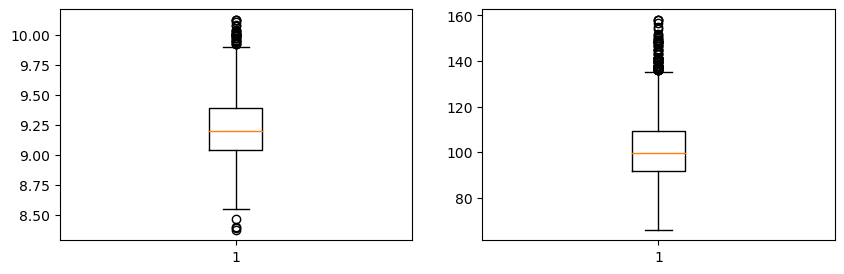

In [46]:
fig, ax = plt.subplots(1,2, figsize = (10,3))
ax[0].boxplot(np.log(df2_['Price']))
ax[1].boxplot(np.sqrt(df2_['Price']))
plt.show()

In [47]:
Data1_ = df2_.drop(columns = df2_[['Price']], axis = 1)
Target1_ = df2_[['Price']]

In [48]:
model4_ = LinearRegression()
model5_ = LinearRegression()
model6_ = LinearRegression()
model4_.fit(Data1_,Target1_)
model5_.fit(Data1_, np.log(Target1_))
model6_.fit(Data1_, np.sqrt(Target1_))

LinearRegression()

In [49]:
# writing R_square values in tabilar form
d1_ = {"model": ['no transformation', 'log_transformed','sqrt_transform'],
     "R_square_value": [model4_.score(Data1_,Target1_), model5_.score(Data1_,np.log(Target1_)),
                        model6_.score(Data1_,np.sqrt(Target1_))]}
Result_ = pd.DataFrame(data = d1_)
Result_

,model,R_square_value
0,no transformation,0.858876
1,log_transformed,0.846878
2,sqrt_transform,0.861076


**Removing the outliers only decreased the R_square_value.**
# Model building using Stats OLS

In [50]:
model_st = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df1_).fit()
model_st.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        15:24:22   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Test for Normality of Residuals

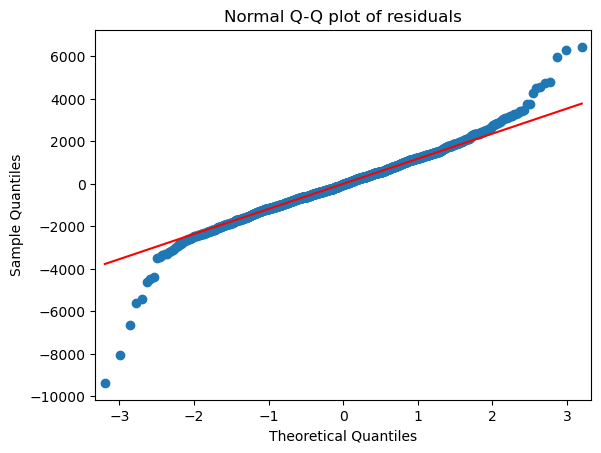

In [51]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_st.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity

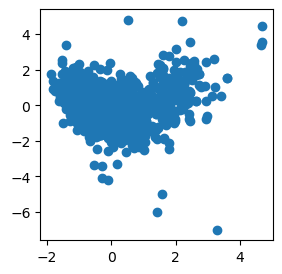

In [52]:
def std( values ):                      #Loop created for return values.
    return (values - values.mean())/values.std()

plt.figure(figsize=(3,3))
plt.scatter(std(model_st.fittedvalues),
            std(model_st.resid))
plt.show()

In [53]:
print(model_st.tvalues, '\n', model_st.pvalues)
#R squared values
print("R_square and R_square adjusted:", model_st.rsquared,model_st.rsquared_adj)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64
R_square and R_square adjusted: 0.8637627463428192 0.8629989775766963


**R_square is about the same as obtained from the LinearRegression algorithm**

# Improving the model: Detecting Influencers/Outliers  
# Cook’s Distance

In [54]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model_st.get_influence()
(c, _) = model_influence.cooks_distance

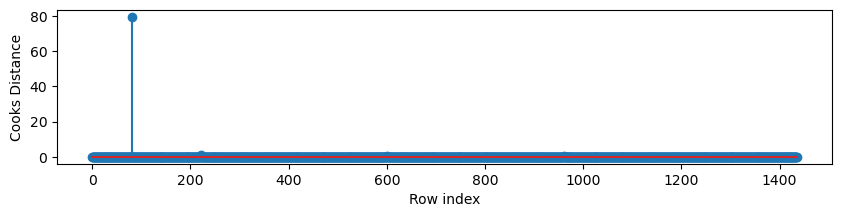

In [55]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(10, 2))
plt.stem(np.arange(len(df1_)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [56]:
#The Cook's distance is considered high if it is greater than 0.5 and extreme if it is greater than 1
#index and value of influencer 
for distance in c:
    ind = np.where(c >1)[0]
ind

array([ 80, 221], dtype=int64)

In [57]:
df3_=df1_.drop(df1_.index[[80, 221]],axis=0).reset_index()

In [58]:
#Drop the original index
df3_=df3_.drop(['index'],axis=1)

In [59]:
model1_st = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df3_).fit()

In [60]:
(model1_st.rsquared,model1_st.aic)

(0.8778445878599779, 24574.7766156388)

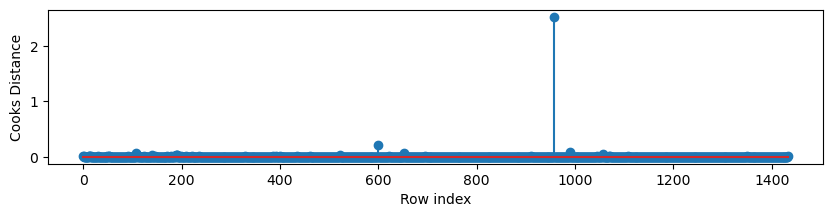

In [61]:
model_influence = model1_st.get_influence()
(c1, _) = model_influence.cooks_distance
fig = plt.subplots(figsize=(10, 2))
plt.stem(np.arange(len(df3_)), np.round(c1, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [62]:
for distance in c1:
    ind = np.where(c1 >1)[0]
ind

array([958], dtype=int64)

In [63]:
df4_=df3_.drop(df3_.index[[958]],axis=0).reset_index()
df4_=df4_.drop(['index'],axis=1)
model2_st = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df4_).fit()
(model2_st.rsquared,model2_st.aic)

(0.8851845904421739, 24469.715205158594)

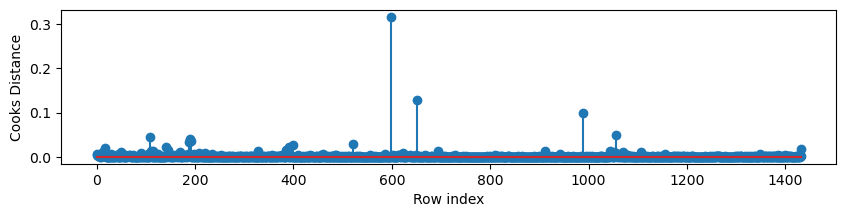

In [64]:
model_influence = model2_st.get_influence()
(c2, _) = model_influence.cooks_distance
fig = plt.subplots(figsize=(10, 2))
plt.stem(np.arange(len(df4_)), np.round(c2, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [72]:
(np.argmax(c2),np.max(c2))

(599, 0.3166131528144162)

**Since the influencer is <1 , we can stop the diagnostic process and finalize the model**

# Therefore, our final model is model2_st

# Test for Normality of Residuals with final model

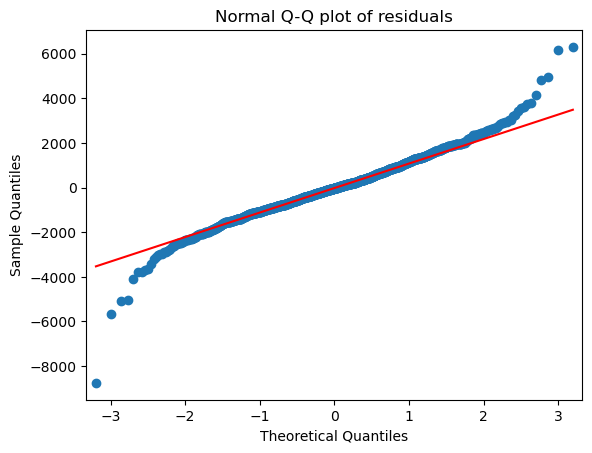

In [73]:
# qqplot with final model
qqplot=sm.qqplot(model2_st.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity for final model

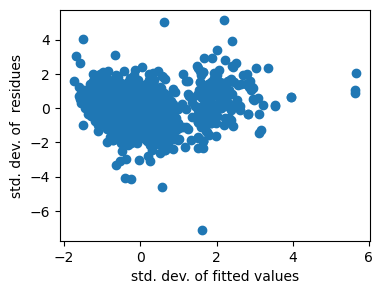

In [81]:
def std( values ):                      #Loop created for return values.
    return (values - values.mean())/values.std()

plt.figure(figsize=(4,3))
plt.scatter(std(model2_st.fittedvalues),
            std(model2_st.resid))
plt.xlabel("std. dev. of fitted values")
plt.ylabel("std. dev. of  residues")
plt.show()

# Residual Vs Regressors

eval_env: 1


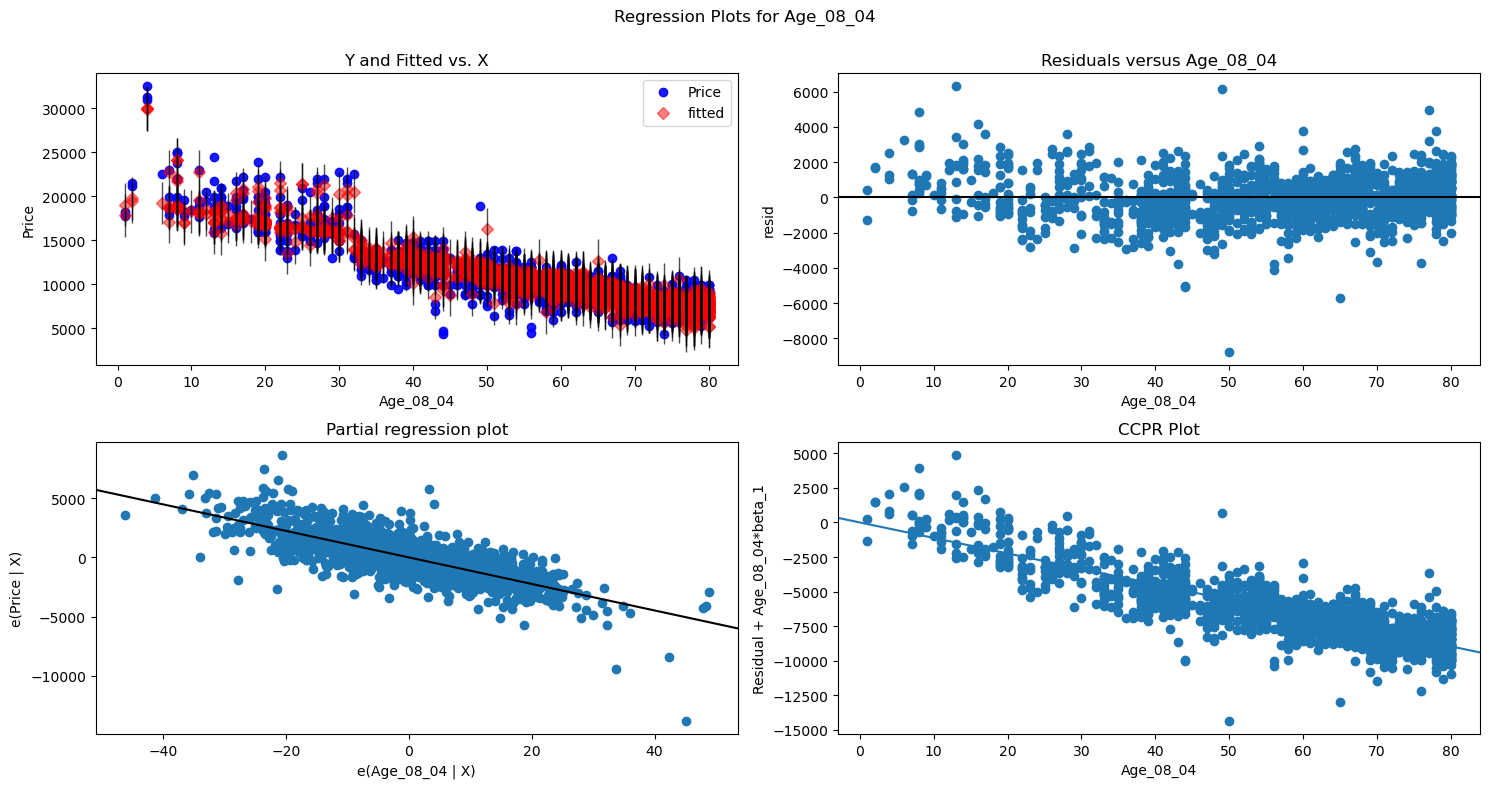

In [82]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2_st, "Age_08_04", fig=fig)
plt.show()

eval_env: 1


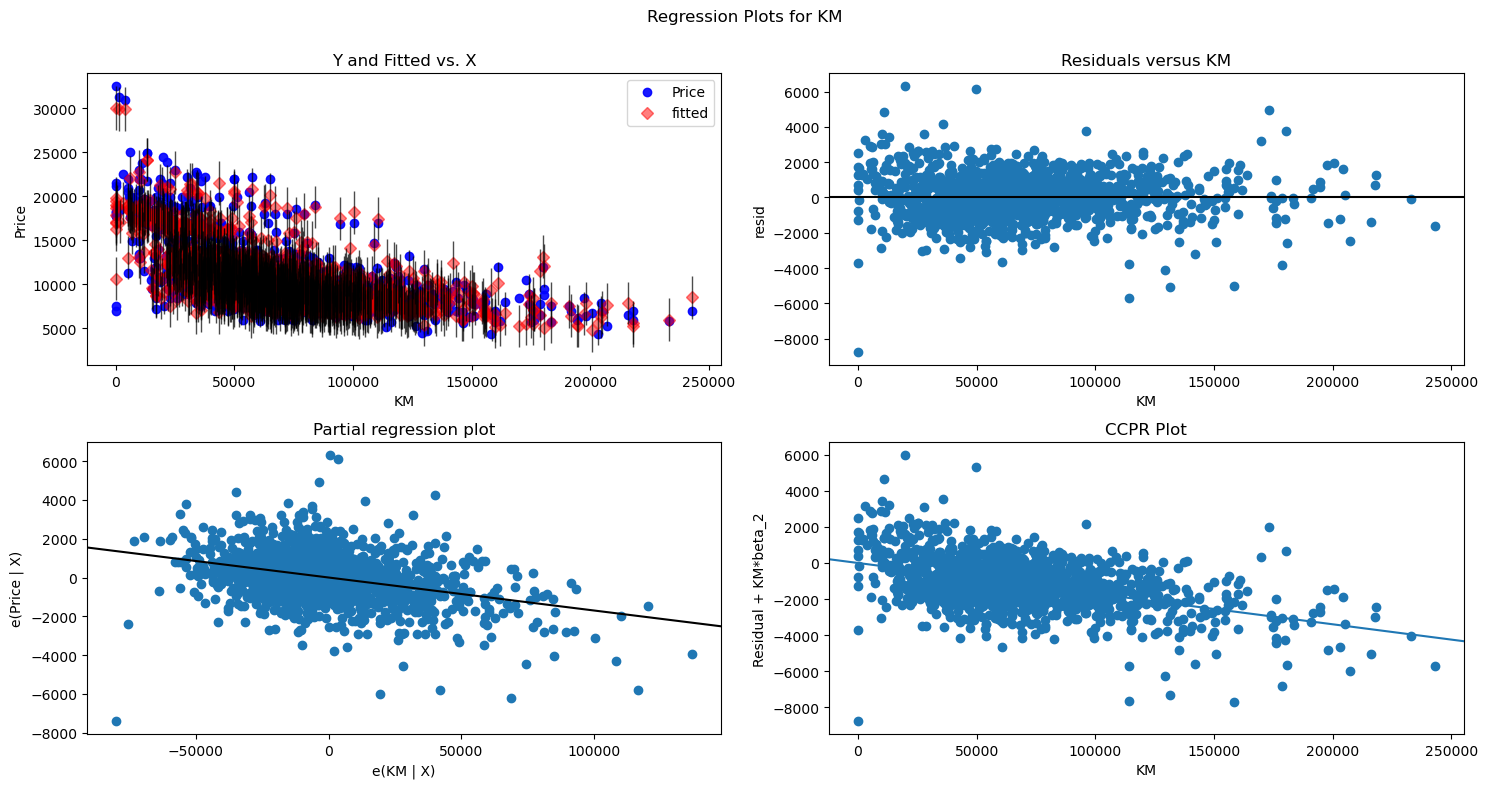

In [83]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2_st, "KM", fig=fig)
plt.show()

eval_env: 1


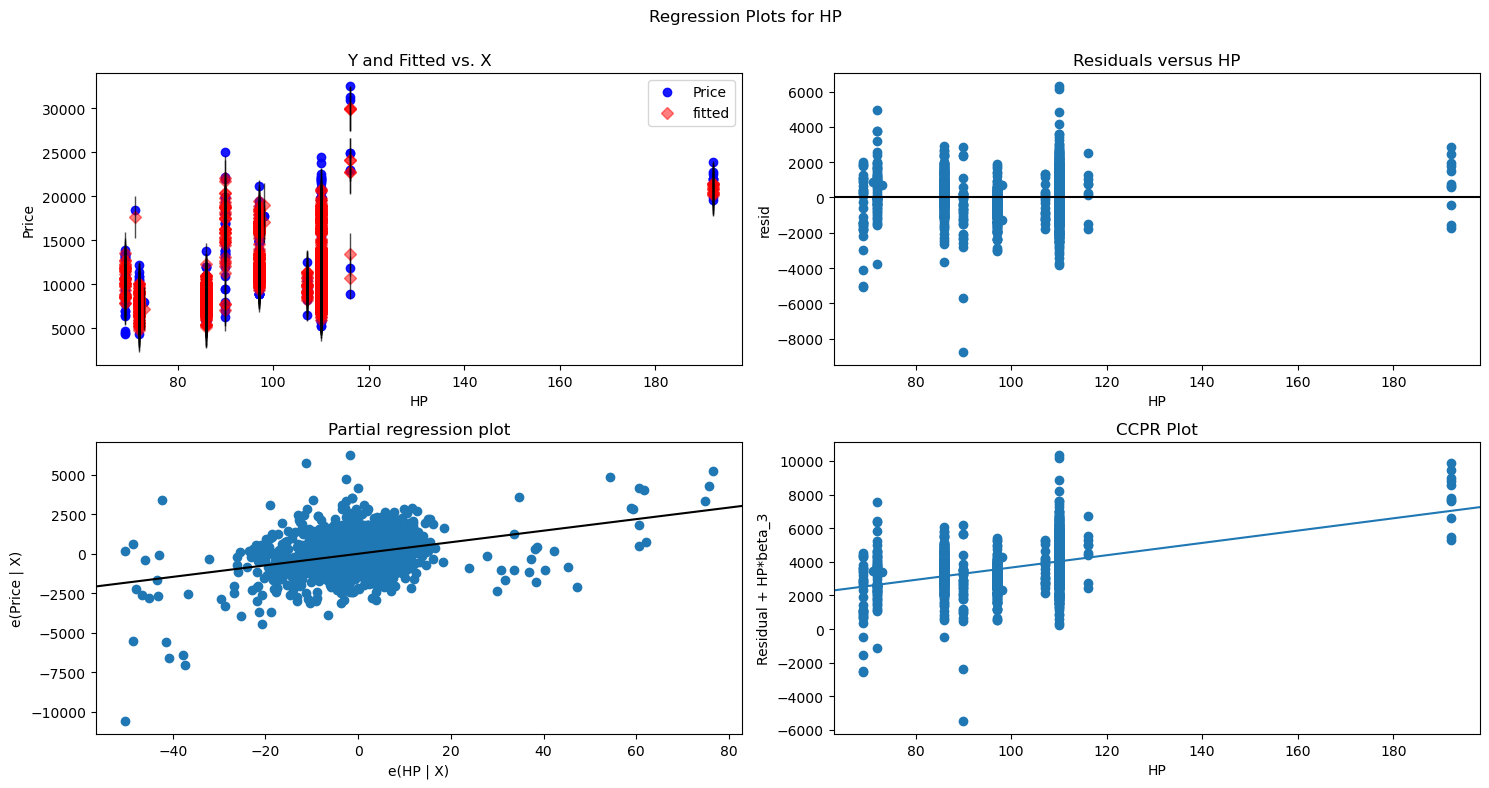

In [87]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2_st, "HP", fig=fig)
plt.show()

eval_env: 1


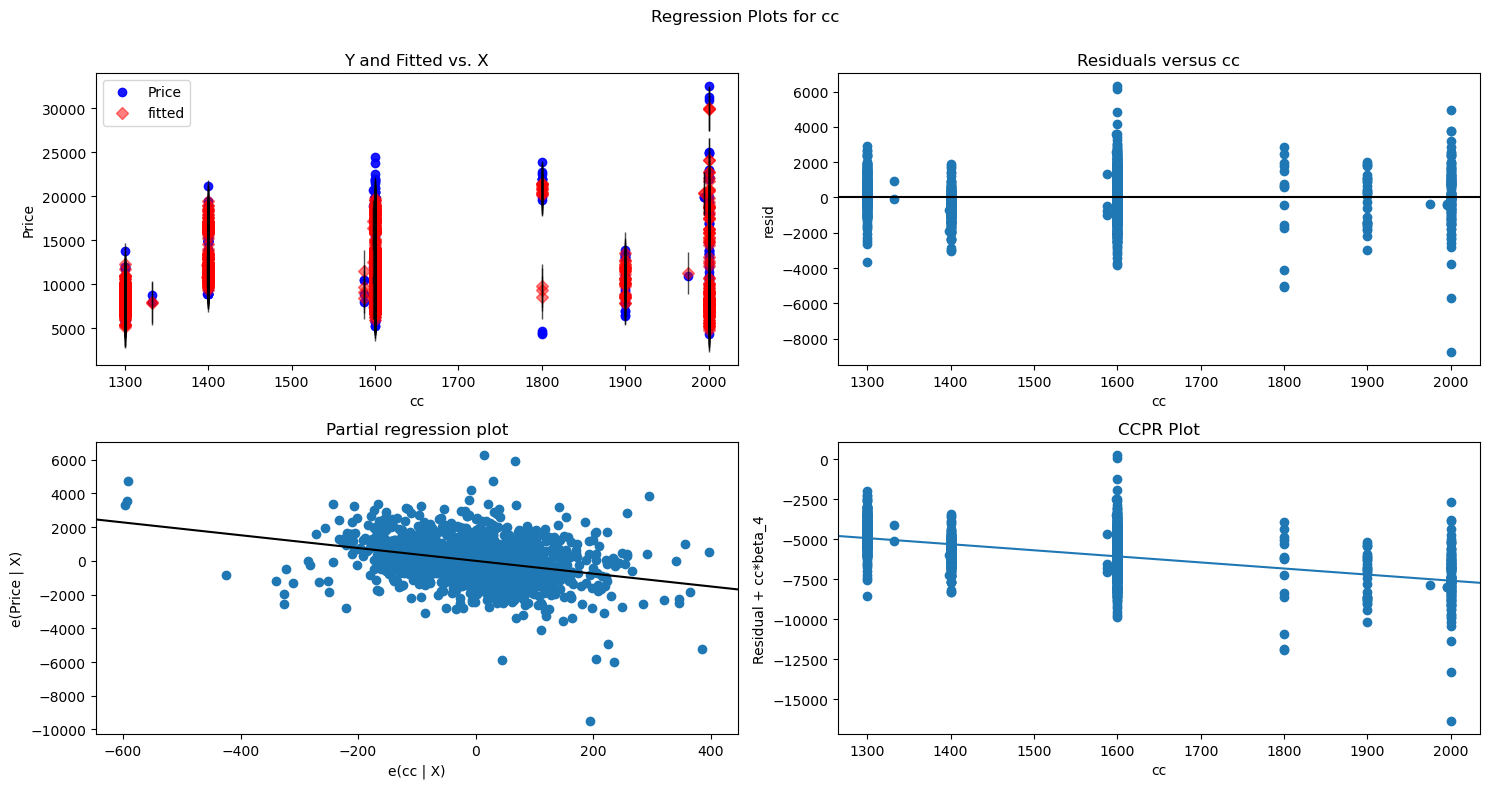

In [89]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2_st, "cc", fig=fig)
plt.show()

eval_env: 1


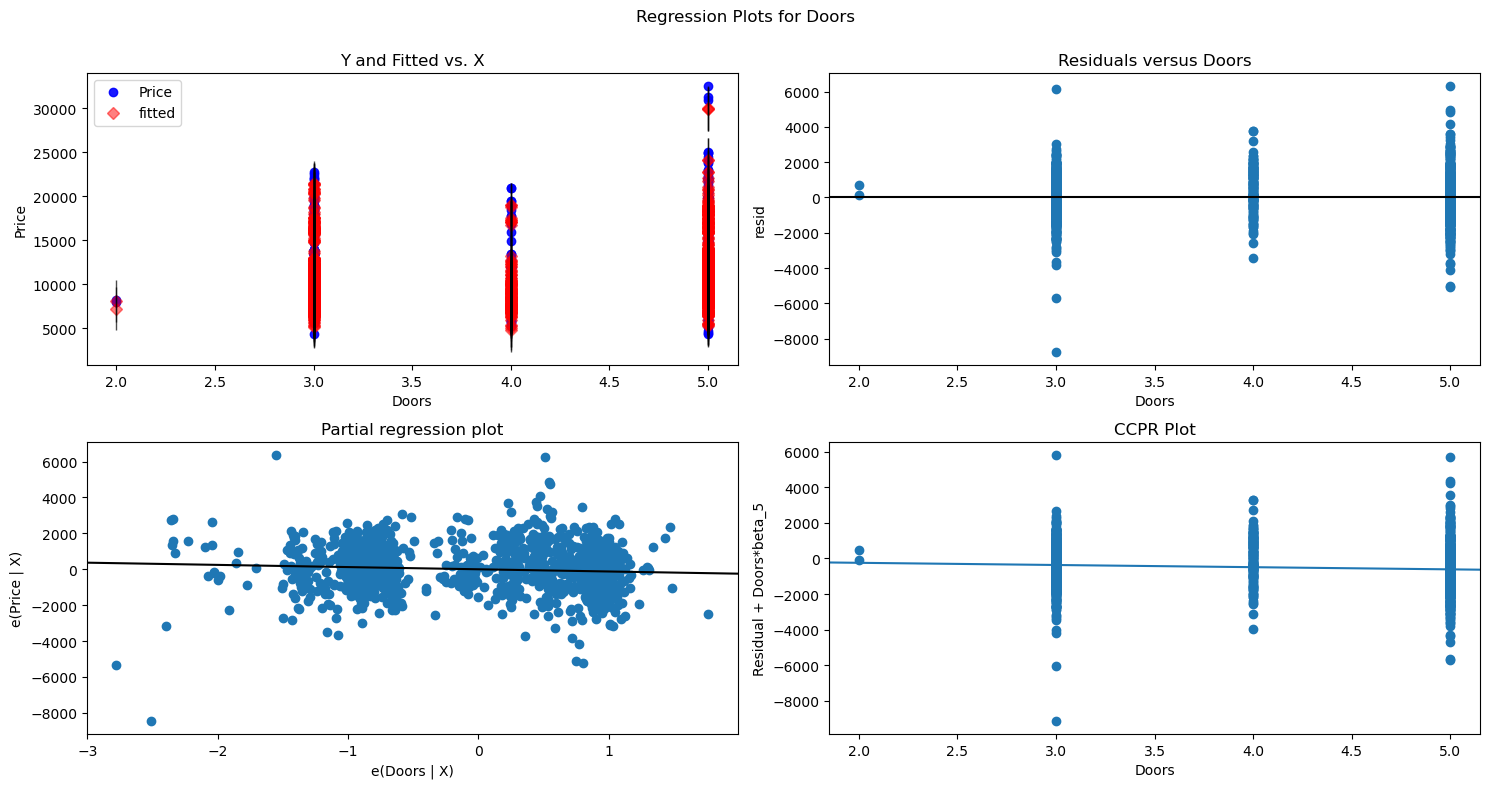

In [90]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2_st, "Doors", fig=fig)
plt.show()

eval_env: 1


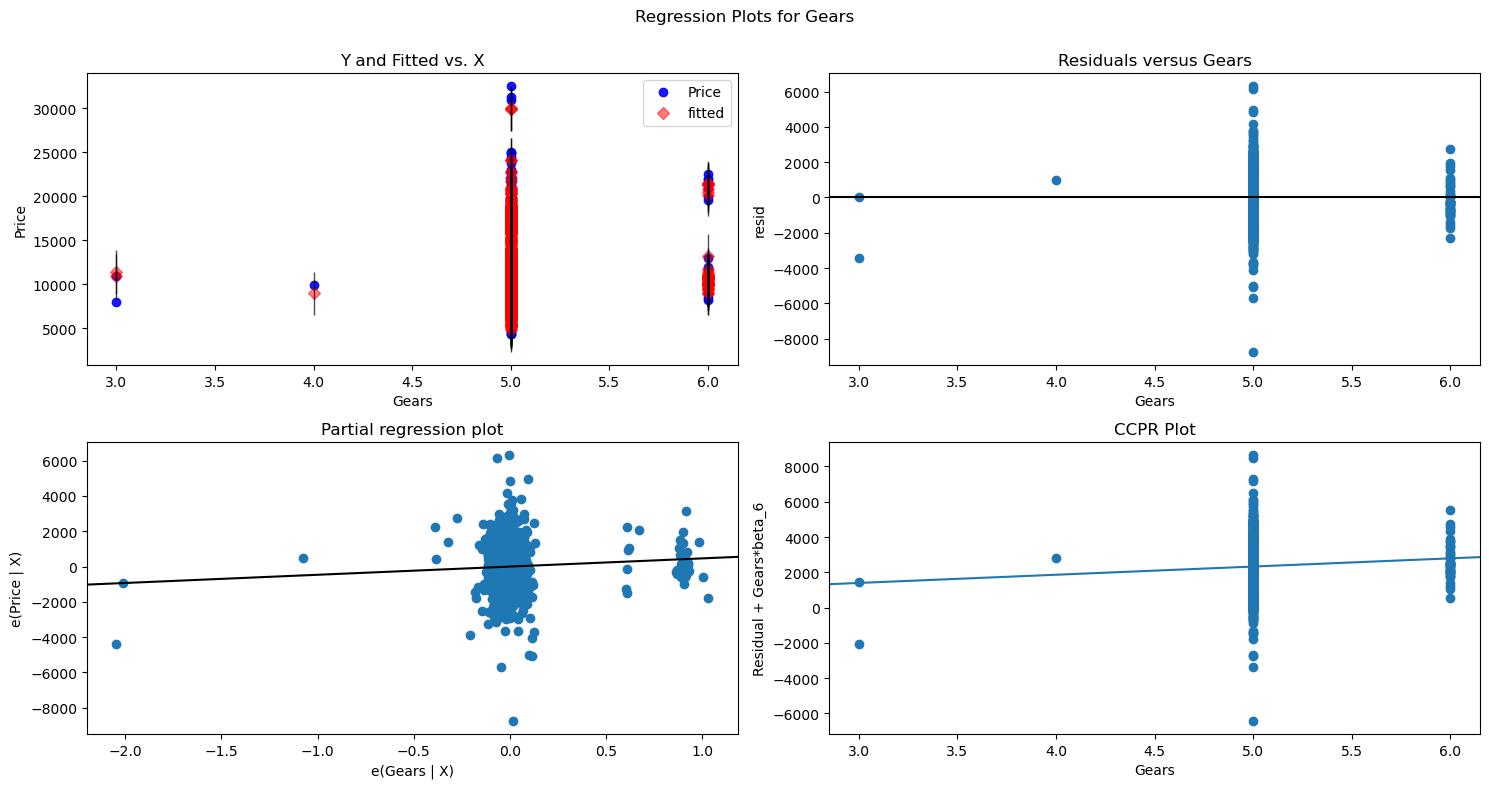

In [91]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2_st, "Gears", fig=fig)
plt.show()

eval_env: 1


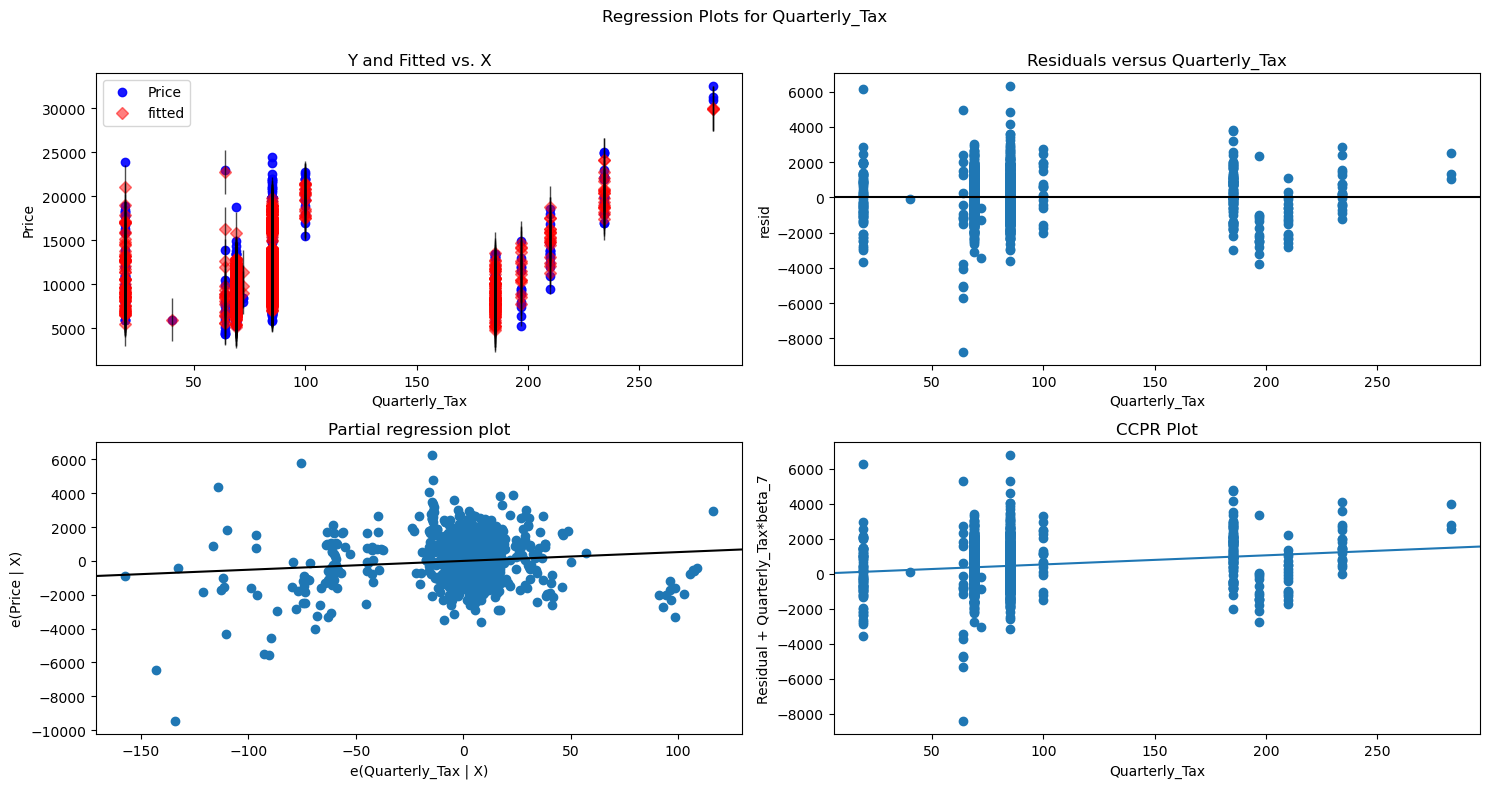

In [92]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2_st, "Quarterly_Tax", fig=fig)
plt.show()

eval_env: 1


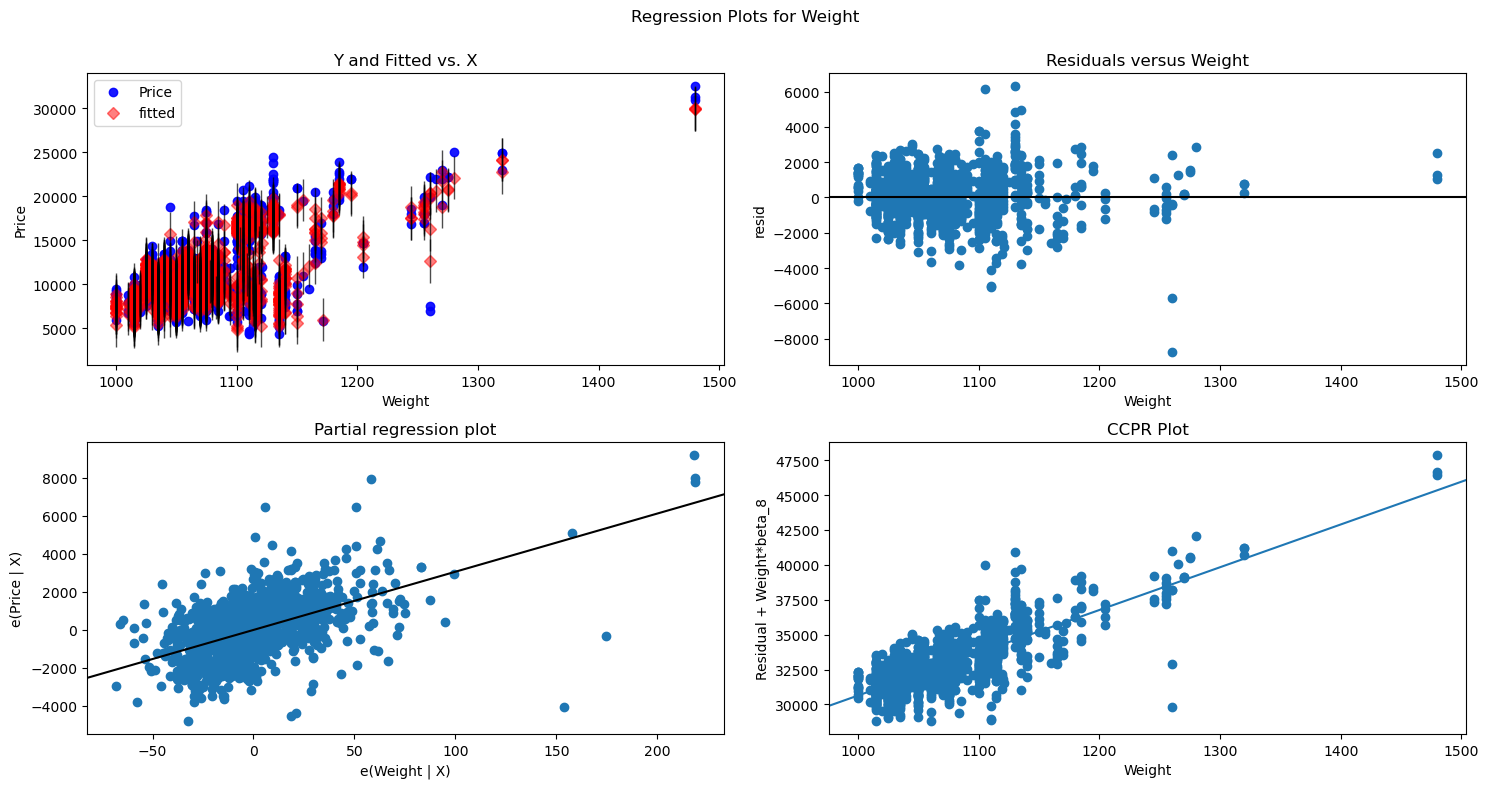

In [93]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2_st, "Weight", fig=fig)
plt.show()

In [88]:
print("R square and AIC values :", (model2_st.rsquared,model2_st.aic))
print("Following are the model parameters:" "\n", model2_st.params)

R square and AIC values : (0.8851845904421739, 24469.715205158594)
Following are the model parameters:
 Intercept       -14743.311719
Age_08_04         -112.018007
KM                  -0.016992
HP                  36.608402
cc                  -3.795426
Doors             -122.543739
Gears              464.983862
Quarterly_Tax        5.213440
Weight              30.639784
dtype: float64


# Prediction for new data

In [96]:
data_new=pd.DataFrame({"Age_08_04":35,"KM":42500, "HP":70,"cc":1000,"Doors":3,"Gears":5,"Quarterly_Tax":186,"Weight":1250 },
                      index=[1]) 
model2_st.predict(data_new)


1    20607.798829
dtype: float64